# Simple Linear Regression using python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("./datasets/Advertising.csv")
df.drop(columns = "Unnamed: 0",axis = 1 ,inplace= True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [17]:
## We will make a new column named total spent

df["total_spent"] = df["TV"] + df["Newspaper"] + df["Sales"]
df.head()

,TV,Radio,Newspaper,Sales,total_spent
0,230.1,37.8,69.2,22.1,321.4
1,44.5,39.3,45.1,10.4,100.0
2,17.2,45.9,69.3,9.3,95.8
3,151.5,41.3,58.5,18.5,228.5
4,180.8,10.8,58.4,12.9,252.1


<Axes: xlabel='Sales', ylabel='total_spent'>

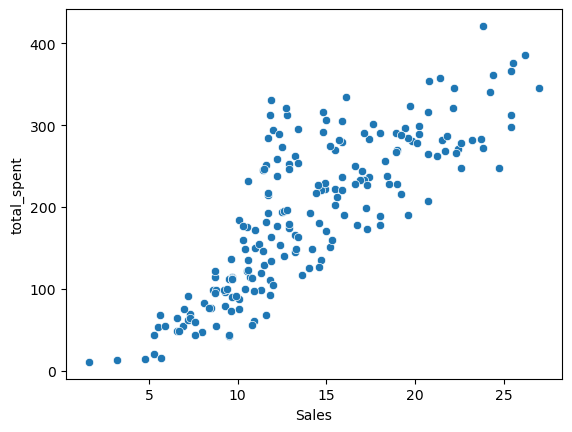

In [18]:
## Visualize scatter plot the total spent with respect to sales
sns.scatterplot(data = df ,x = "Sales" ,y = "total_spent")

<Axes: xlabel='Sales', ylabel='total_spent'>

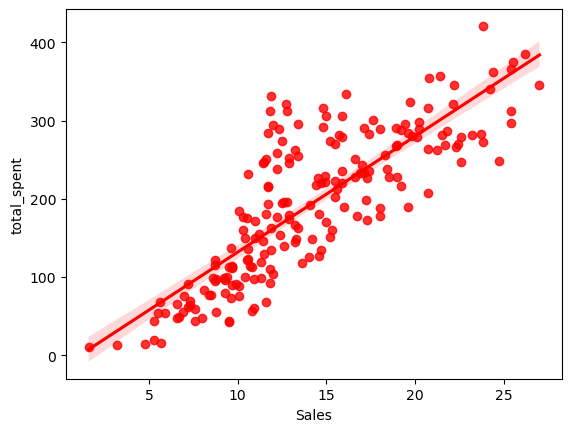

In [20]:
## Visualize scatter plot the total spent with respect to sales
sns.regplot(data = df ,x = "Sales" ,y = "total_spent" ,color = "red")


In [21]:
##  split the data into x and y
X = df["total_spent"]
y = df["Sales"]

In [22]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_

In [23]:
# y = mx + c
# y = B1x + B0

np.polyfit(X ,y ,deg = 1)

array([0.04566643, 5.27194407])

In [26]:
potential_spent = np.linspace(0,500,100)

In [29]:
predicted_sales = 0.04566643 * potential_spent + 5.27194407


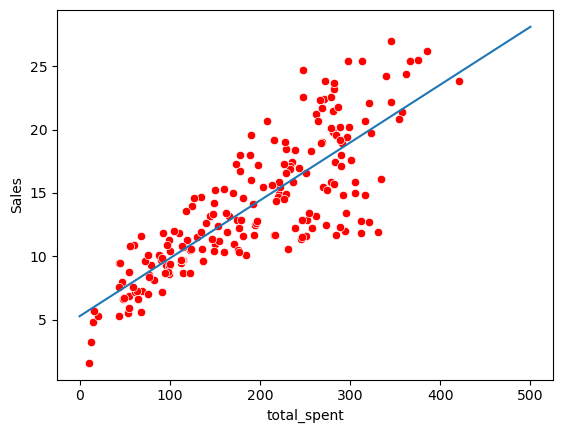

In [37]:
## Visualize scatter plot the total spent with respect to sales
sns.scatterplot(data = df ,x = "total_spent" ,y = "Sales" ,color = "red")
plt.plot(potential_spent ,predicted_sales)


In [39]:
np.polyfit(X ,y ,deg = 3)
# y = mx + c
# y = B1x + B0
# y = b3*x**3 + b2* x**2 + b1*x +b0

array([ 3.74590544e-07, -2.43375789e-04,  9.10703113e-02,  3.11822181e+00])

In [42]:
# y = b3*x**3 + b2* x**2 + b1*x +b0
pot_spent = np.linspace(0,500,100)

pred_sales = 3.74590544e-07*pot_spent**3 -2.43375789e-04*pot_spent**2 + 9.10703113e-02*pot_spent +3.11822181e+00

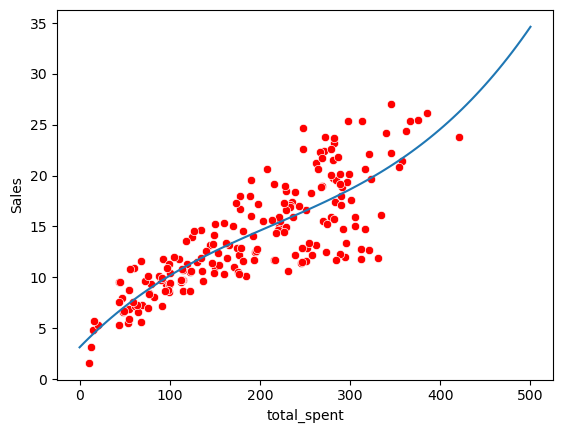

In [43]:
sns.scatterplot(data = df ,x = "total_spent" ,y = "Sales" ,color = "red")
plt.plot(pot_spent ,pred_sales)

# LinearRegression with Scikit-Learn

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [45]:
df = pd.read_csv("./datasets/Advertising.csv")
df.drop(columns = "Unnamed: 0",axis = 1 ,inplace= True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


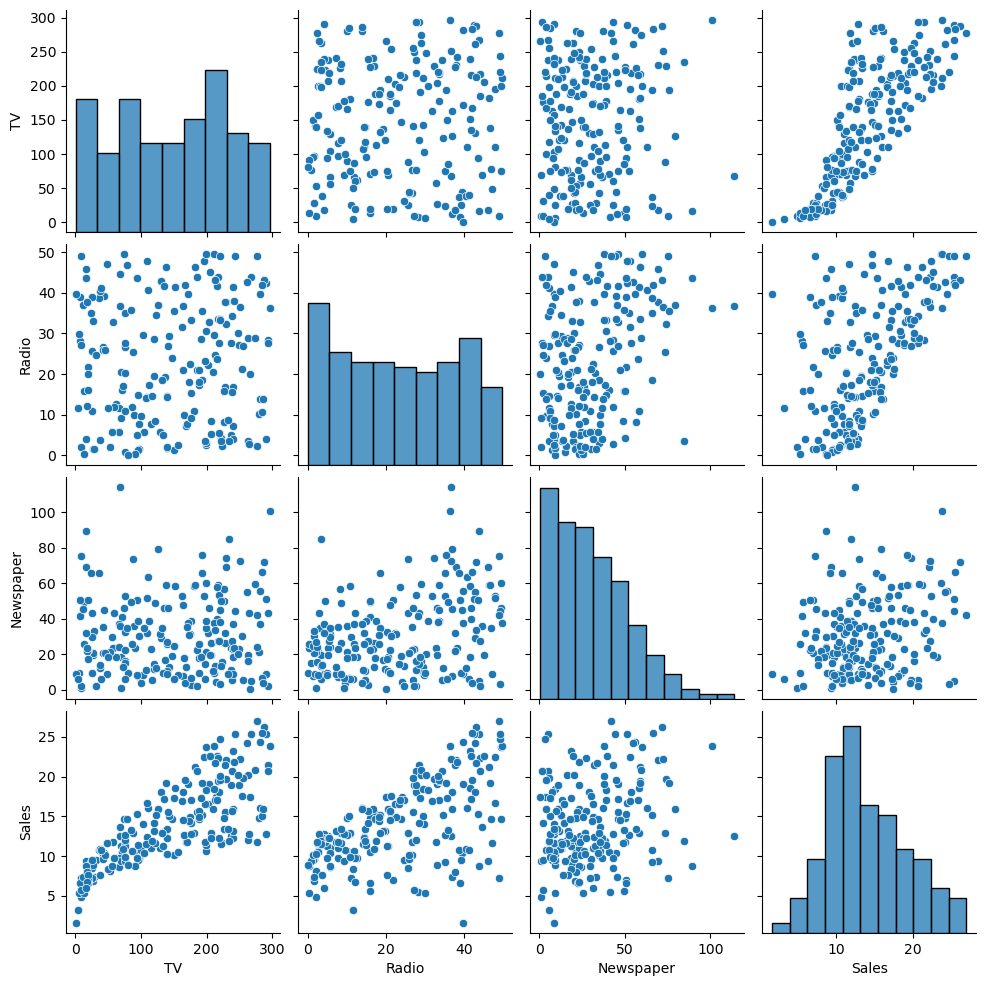

In [46]:
sns.pairplot(df)

In [49]:
## help(sns.pairplot)

In [51]:
X = df.drop("Sales" ,axis = 1)
y = df["Sales"]

In [63]:
#elp(train_test_split)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train ,y_train)

LinearRegression()

In [74]:
preds =  model.predict(X_test)
preds

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

## Evaluation Metrics

In [86]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error
df["Sales"].mean()

14.0225

In [84]:
## Mean-absolute-error

print("MAE using Scikit",mean_absolute_error(y_test ,preds))

print("MAE using formula",sum(abs(y_test - preds))/len(preds))

MAE using Scikit 1.5116692224549084
MAE using formula 1.511669222454908


In [88]:
## Mean-absolute-error

print("MSE using Scikit",mean_squared_error(y_test ,preds))

print("MSE using formula",sum((y_test - preds)**2)/len(preds))

MSE using Scikit 3.79679723671522
MSE using formula 3.796797236715219


In [89]:
## RMSE
np.sqrt(mean_squared_error(y_test ,preds))

1.9485372043446387

## Evaluating Residuals

In [92]:
y_residuals = y_test - preds
y_residuals.head()

95     0.334604
15     1.211772
30    -0.151071
158   -3.589238
128    2.497680
Name: Sales, dtype: float64

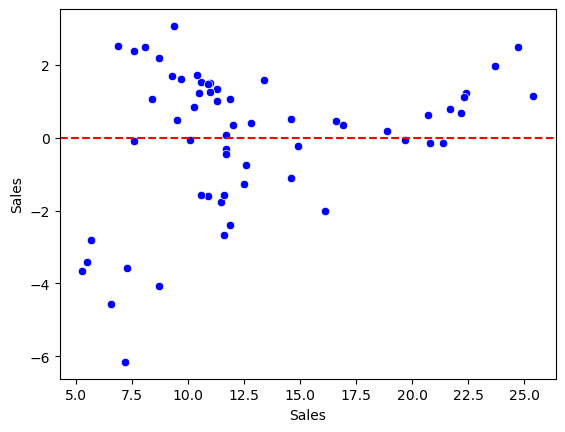

In [111]:
## Residual plot should have random values based on red line
sns.scatterplot(x = y_test ,y = y_residuals ,color = "b" )
plt.axhline(y = 0 ,color = "r" ,ls = "--");

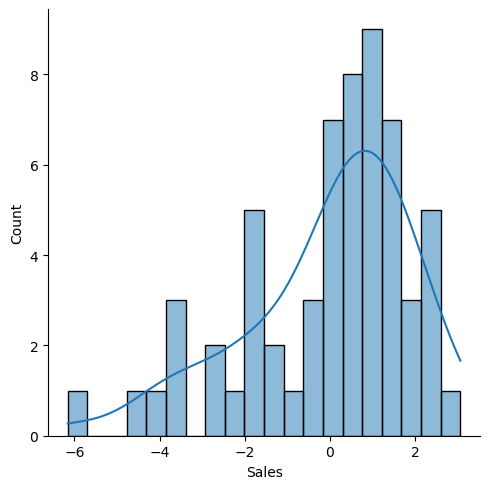

In [115]:
## Distplot show hist and kde 
sns.displot(y_residuals ,kde = True ,bins = 20)

## Normal probability plot

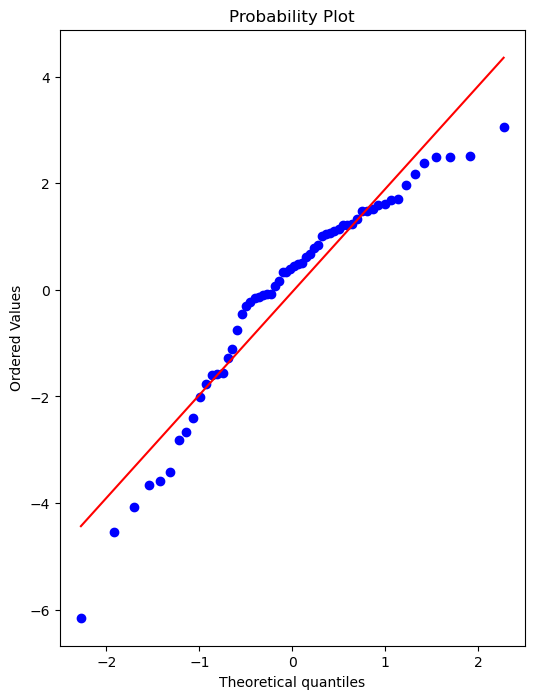

In [128]:
import scipy as sp

fig ,ax = plt.subplots(figsize = (6,8) ,dpi = 100)

_ = sp.stats.probplot(y_residuals ,plot = ax)

## Model deployment


In [129]:
finalmodel = LinearRegression()
finalmodel.fit(X,y)

LinearRegression()

In [130]:
finalmodel.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [134]:
finalmodel.intercept_

2.9388893694594067

In [137]:
## Save and load model
from joblib import dump ,load
dump(finalmodel ,"./LinearRegressin.joblib")

['./LinearRegressin.joblib']

In [138]:
model_load = load("./LinearRegressin.joblib")

In [154]:
## predict the output for values below
# TV 200 , Radio 50 ,Newspaper = 60

campagn = pd.DataFrame({"TV":[12] ,"Radio":[14] ,"Newspaper":[13]})
campagn

,TV,Radio,Newspaper
0,12,14,13


In [155]:
model_load.predict (campagn)

array([6.11399794])

# Polynomal Regression


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [115]:
df = pd.read_csv("./datasets/Advertising.csv")
df.drop(columns = "Unnamed: 0",axis = 1 ,inplace= True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [116]:
X = df.drop("Sales",axis = 1)
y = df["Sales"]

In [79]:
from sklearn.preprocessing import PolynomialFeatures

poly_converter = PolynomialFeatures(degree = 2 ,interaction_only=False ,include_bias=False)

polyFeatures = poly_converter.fit_transform(X)
polyFeatures[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [80]:
X_train, X_test, y_train, y_test = train_test_split(polyFeatures, y, test_size=0.3, random_state=42)

In [81]:
from sklearn.linear_model import LinearRegression

polymodel = LinearRegression()
polymodel.fit(X_train ,y_train)


LinearRegression()

In [82]:
preds = polymodel.predict(X_test)

In [83]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error
## Mean-absolute-error

print("MAE using Scikit",mean_absolute_error(y_test ,preds))
print("RMSE",np.sqrt(mean_squared_error(y_test ,preds)))

MAE using Scikit 0.5905974833808012
RMSE 0.723321847385754


## Degree of cmplexity

In [84]:
train_rmse = []
test_rmse = []
for i in range (1,10):
    poly_converter = PolynomialFeatures(degree = i ,include_bias=False)

    polyFeatures = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(polyFeatures, y, test_size=0.3, random_state=42)    
    
    polymodel = LinearRegression()
    polymodel.fit(X_train ,y_train)
    
    trainpreds = polymodel.predict(X_train)
    testpreds = polymodel.predict(X_test)
    
    
    rmse_train = np.sqrt(mean_squared_error( trainpreds ,y_train))
    rmse_test = np.sqrt(mean_squared_error( testpreds ,y_test))
    
    train_rmse.append(rmse_train)
    test_rmse.append(rmse_test)
    
    

In [85]:
train_rmse

[1.574596830590544,
 0.5950712355838924,
 0.46887581118220883,
 0.3694689701771597,
 0.24382207811380469,
 0.19671337047311022,
 0.42461444290813044,
 0.15843081769436082,
 0.16559288306589603]

In [86]:
test_rmse

[1.9485372043446385,
 0.723321847385754,
 0.5392350985593082,
 1.3032266106293382,
 5.946507198306904,
 25.96499047924574,
 634.4704983493756,
 2697.7667366805845,
 132859.53269165484]

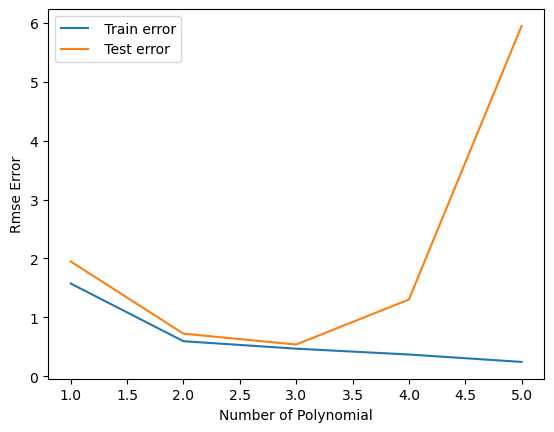

In [99]:
plt.plot(range(1,6) ,train_rmse[:5] ,label = " Train error")
plt.plot(range(1,6) ,test_rmse[:5] ,label = " Test error")
plt.xlabel("Number of Polynomial")
plt.ylabel("Rmse Error")
plt.legend()

## Model deployment for polynomial Regression

In [126]:
from joblib import dump,load

final_converter = PolynomialFeatures(degree = 3 ,include_bias=False)
finalFeatures = final_converter.fit_transform(X)
finalmodel = LinearRegression()
finalmodel.fit(finalFeatures ,y)

dump(finalmodel ,"finalModle.joblib")
dump(final_converter ,"featureConverter.joblib")

['featureConverter.joblib']

In [127]:
## Load the model and prediction

poly_model_load= load("finalModle.joblib")
poly_features = load("featureConverter.joblib")

campagn = [[149 ,22,22]]

trans = poly_features.fit_transform(campagn)
poly_model_load.predict(trans)

array([14.60262555])

# Datasetup 

## Regularization for linear Regression

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [244]:
df = pd.read_csv("./datasets/Advertising.csv")
df.drop(columns = "Unnamed: 0",axis = 1 ,inplace= True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [245]:
X = df.drop("Sales",axis = 1)
y = df["Sales"]

In [246]:
from sklearn.preprocessing import PolynomialFeatures

poly_converter = PolynomialFeatures(degree = 3 ,interaction_only=False ,include_bias=False)
poly_Features = poly_converter.fit_transform(X)


In [247]:
poly_Features.shape

(200, 19)

In [248]:
X_train, X_test, y_train, y_test = train_test_split(poly_Features, y, test_size=0.3, random_state=42)  

In [249]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

# Ridge Regression

In [250]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error ,mean_squared_error

In [251]:
ridge_model = Ridge(alpha=10)

In [252]:
ridge_model.fit(X_train ,y_train)

Ridge(alpha=10)

In [253]:
y_preds = ridge_model.predict(X_test)

In [254]:
MAE = mean_absolute_error(y_preds ,y_test)
MAE

0.3974983466770167

In [255]:
RMSE =np.sqrt(mean_squared_error(y_preds ,y_test))
RMSE

0.5390836050432968

## CrossValidation RidgeCV

In [256]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import SCORERS

In [257]:
ridge_cv = RidgeCV(alphas=(0.01,0.1, 1.0, 10.0 ,100),scoring="neg_mean_absolute_error")

In [258]:
ridge_cv.fit(X_train ,y_train)

RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0, 100), scoring='neg_mean_absolute_error')

In [259]:
ridge_cv.alpha_

100.0

In [260]:
y_preds = ridge_cv.predict(X_test)

In [261]:
MAE = mean_absolute_error(y_preds ,y_test)
MAE

0.3752274039735962

In [262]:
RMSE =np.sqrt(mean_squared_error(y_preds ,y_test))
RMSE

0.5194093826140733

In [263]:
ridge_cv.intercept_

3.777876365124447

In [264]:
ridge_cv.coef_

array([ 9.24261491e-02,  5.42307365e-03,  2.26702127e-02, -4.40002616e-04,
        1.44394147e-03, -3.29127853e-04,  2.78651661e-04,  3.71262610e-04,
        1.63198408e-04,  7.18626422e-07, -9.42859535e-07,  1.10450075e-06,
       -2.13936033e-07, -3.14504061e-06,  3.00578299e-08, -3.97110704e-06,
        3.12586791e-06, -2.43031270e-06, -1.58049383e-06])

In [265]:
ridge_cv.best_score_

-0.4030774493896218

# Lasso Regression
## L1 Regularization

In [266]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error ,mean_squared_error

In [267]:
lasso_cv_model = LassoCV(eps=0.00001,n_alphas=100 ,max_iter=10000)
lasso_cv_model.fit(X_train ,y_train)

LassoCV(eps=1e-05, max_iter=10000)

In [268]:
lasso_cv_model.alpha_

236.80332970681357

In [269]:
y_preds = lasso_cv_model.predict(X_test)

In [270]:
MAE = mean_absolute_error(y_preds ,y_test)
MAE

1.002068686299656

In [271]:
RMSE =np.sqrt(mean_squared_error(y_preds ,y_test))
RMSE

1.2136144283611927

In [272]:
lasso_cv_model.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.14960446e-04,
        3.62600063e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -8.62578962e-07,  1.04035941e-06, -1.29886085e-06,
        1.10839255e-05, -2.64077805e-07,  3.83178449e-06, -0.00000000e+00,
        1.03530334e-05,  3.67463330e-06, -2.92863577e-06])

# ElasticNet
## L1 & L2

In [273]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error ,mean_squared_error

In [274]:
elastic_cv_model = ElasticNetCV(l1_ratio = [0.001,.1, .5, .7,.9, .95, .99, 1],eps=0.001, n_alphas=100,)

In [275]:
elastic_cv_model.fit(X_train ,y_train)

ElasticNetCV(l1_ratio=[0.001, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1])

In [276]:
elastic_cv_model.l1_ratio_

1.0

In [277]:
y_preds = elastic_cv_model.predict(X_test)


In [278]:
MAE = mean_absolute_error(y_preds ,y_test)
MAE

1.2084813357406068

In [279]:
RMSE =np.sqrt(mean_squared_error(y_preds ,y_test))
RMSE

1.7462029015818332